# SVM

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Import dataframe from JSON file
jsonStr = "features_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.tail)

<bound method NDFrame.tail of                                                 class       red     green  \
data/9036/0/9036_idx5_x1051_y2401_class0.png        0  0.813904  0.634866   
data/9036/0/9036_idx5_x2951_y951_class0.png         0  0.886744  0.774951   
data/9036/0/9036_idx5_x3001_y1451_class0.png        0  0.814538  0.619407   
data/9036/0/9036_idx5_x3051_y801_class0.png         0  0.793319  0.489656   
data/9036/0/9036_idx5_x951_y1901_class0.png         0  0.875853  0.726767   
...                                               ...       ...       ...   
data/12905/0/12905_idx5_x651_y2101_class0.png       0  0.819194  0.587933   
data/12905/0/12905_idx5_x701_y2251_class0.png       0  0.686665  0.493617   
data/12905/0/12905_idx5_x2101_y1901_class0.png      0  0.591533  0.428568   
data/12905/0/12905_idx5_x951_y2351_class0.png       0  0.921280  0.880516   
data/12905/0/12905_idx5_x801_y2001_class0.png       0  0.795443  0.618093   

                                             

In [6]:
X = df[['red','blue','green','gray']]
y = df['class']

In [42]:
#using train_test_split for splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=None, shuffle=False)
print('########## Train data ##########')
print(X_train)
print(y_train)
print('########## Test data ##########')
print(X_test)
print(y_test)

########## Train data ##########
                                                     red      blue     green  \
data/9036/0/9036_idx5_x1051_y2401_class0.png    0.813904  0.738700  0.634866   
data/9036/0/9036_idx5_x2951_y951_class0.png     0.886744  0.838381  0.774951   
data/9036/0/9036_idx5_x3001_y1451_class0.png    0.814538  0.734206  0.619407   
data/9036/0/9036_idx5_x3051_y801_class0.png     0.793319  0.636725  0.489656   
data/9036/0/9036_idx5_x951_y1901_class0.png     0.875853  0.804320  0.726767   
...                                                  ...       ...       ...   
data/10295/0/10295_idx5_x1351_y1101_class0.png  0.817195  0.728196  0.590188   
data/10295/0/10295_idx5_x1201_y1251_class0.png  0.848987  0.712842  0.571023   
data/10295/0/10295_idx5_x1001_y351_class0.png   0.894918  0.861426  0.787120   
data/10295/0/10295_idx5_x201_y551_class0.png    0.669827  0.589522  0.390649   
data/10295/0/10295_idx5_x251_y1001_class0.png   0.836158  0.678530  0.506358   

      

## SVM
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Youtube: https://www.youtube.com/watch?v=zEabrO9l1vg, https://www.youtube.com/watch?v=FB5EdxAGxQg

Accuracy Linear Kernel: 0.88325


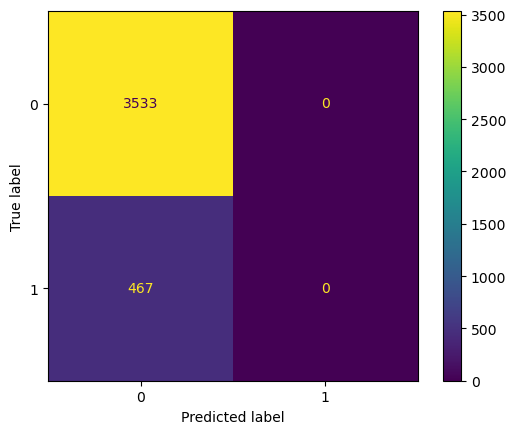

In [43]:
# LINEAR KERNEL SVM
linear = svm.SVC(kernel='linear', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
linear_pred = linear.predict(X_test)
accuracy_lin = linear.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)

# Confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
ConfusionMatrixDisplay.from_predictions(y_test,linear_pred)

Accuracy Sigmoid Kernel: 0.791


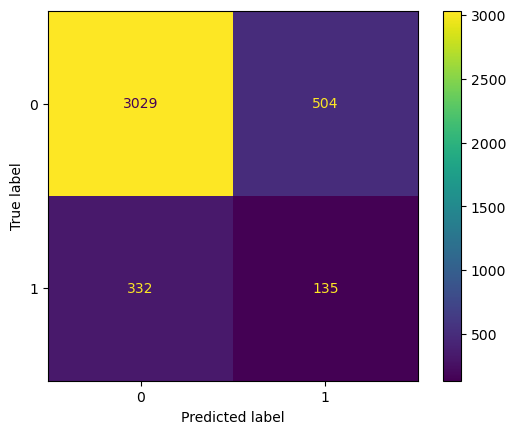

In [44]:
# SIGMOID KERNEL SVM
sig = svm.SVC(kernel='sigmoid', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
sig_pred = sig.predict(X_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

# Confusion matrix
cm_sig = confusion_matrix(y_test, sig_pred)
#print('Confusion matrix linear kernel:\n',cm_sig)
ConfusionMatrixDisplay.from_predictions(y_test,sig_pred)

Accuracy RBF Kernel: 0.88825


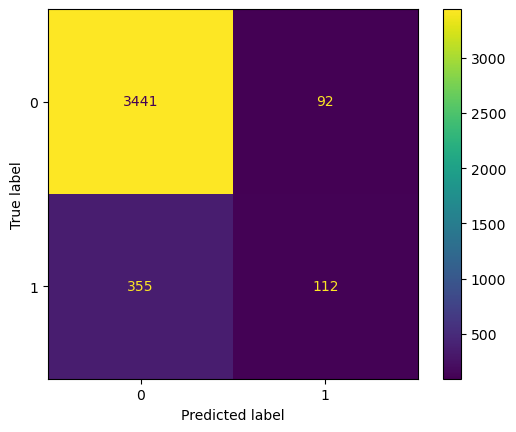

In [45]:
# RBF
rbf = svm.SVC(kernel='rbf', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
rbf_pred = rbf.predict(X_test)
accuracy_rbf = rbf.score(X_test, y_test)
print('Accuracy RBF Kernel:', accuracy_rbf)

# Confusion matrix
cm_rbf = confusion_matrix(y_test, rbf_pred)
ConfusionMatrixDisplay.from_predictions(y_test,rbf_pred)

Accuracy Polynomial Kernel: 0.888


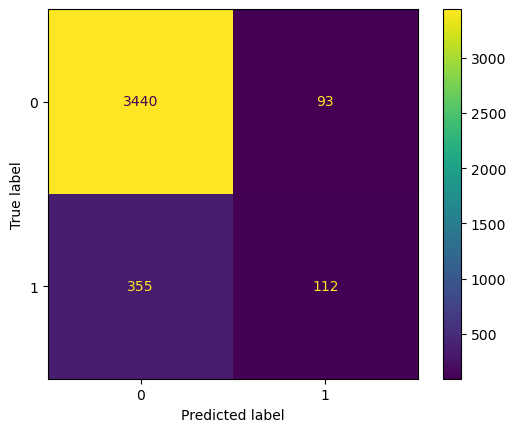

In [46]:
# Polynomial
poly = svm.SVC(kernel='poly', degree=3, gamma='scale', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
poly_pred = poly.predict(X_test)
accuracy_poly = poly.score(X_test, y_test)
print('Accuracy Polynomial Kernel:', accuracy_poly)

# Confusion matrix
cm_poly = confusion_matrix(y_test, poly_pred)
ConfusionMatrixDisplay.from_predictions(y_test,poly_pred)